In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install sweetviz
import sweetviz as sv

# Leitura do dataset
dataset = pd.read_csv('train.csv')

Média: 29.70
Moda: 24.00
Mediana: 28.00


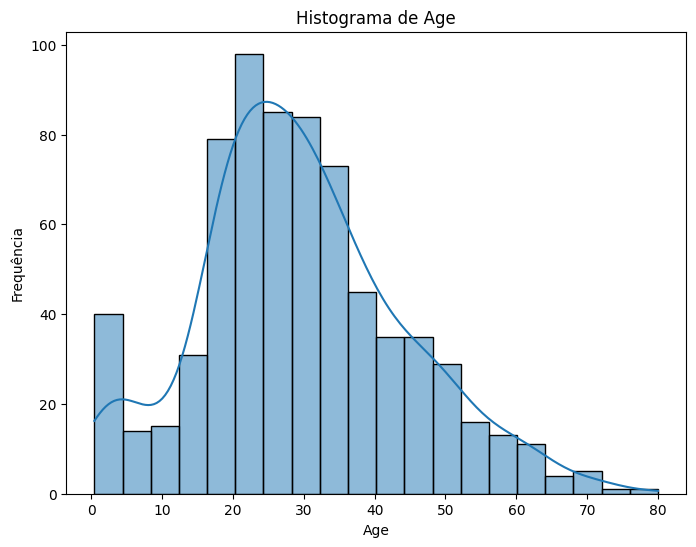

In [3]:
# Variável quantitativa
quantitative_var = 'Age'

# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(dataset[quantitative_var].dropna(), kde=True)
plt.xlabel(quantitative_var)
plt.ylabel('Frequência')
plt.title('Histograma de {}'.format(quantitative_var))

# Média, moda e mediana
mean_value = dataset[quantitative_var].mean()
mode_value = dataset[quantitative_var].mode()[0]
median_value = dataset[quantitative_var].median()

print("Média: {:.2f}".format(mean_value))
print("Moda: {:.2f}".format(mode_value))
print("Mediana: {:.2f}".format(median_value))

Text(0.5, 1.0, 'Boxplot de Fare')

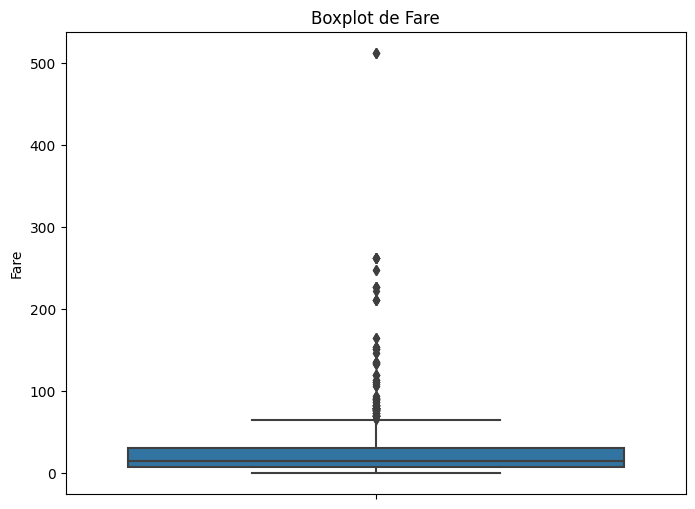

In [4]:
# Variável quantitativa
quantitative_var = 'Fare'

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=dataset[quantitative_var])
plt.ylabel(quantitative_var)
plt.title('Boxplot de {}'.format(quantitative_var))

Text(0.5, 1.0, 'Distribuição de Sex')

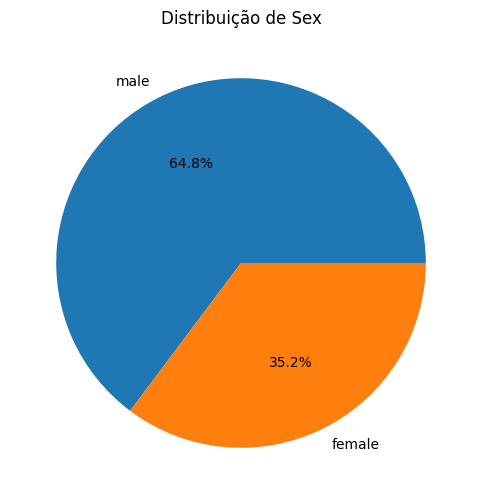

In [5]:
# Variável qualitativa
qualitative_var = 'Sex'

# Gráfico de setores
plt.figure(figsize=(8, 6))
dataset[qualitative_var].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribuição de {}'.format(qualitative_var))

TypeError: tuple indices must be integers or slices, not str

<Figure size 1000x800 with 0 Axes>

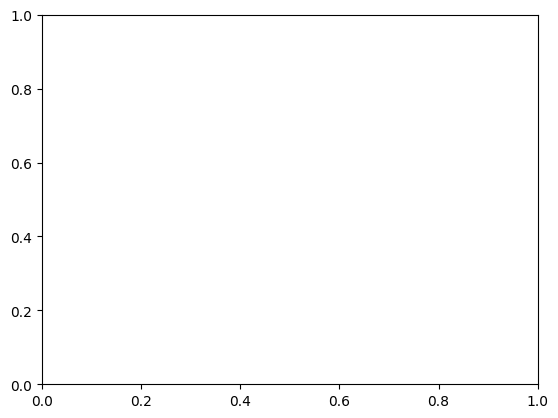

In [11]:
from statsmodels.graphics.mosaicplot import mosaic

categorical_vars = 'Sex'

# Gráfico de mosaico
plt.figure(figsize=(10, 8))
mosaic_df = dataset[categorical_vars].copy()
mosaic_df['Survived'] = dataset['Survived'].map({0: 'Não', 1: 'Sim'})
mosaic_df['Survived'] = pd.Categorical(mosaic_df['Survived'], ordered=True, categories=['Não', 'Sim'])
mosaic(mosaic_df, ['Pclass', 'Embarked', 'Survived'], axes_label=True)
plt.title('Gráfico de Mosaico para Pclass, Embarked e Survived')

Text(0.5, 1.0, 'Relação entre Survived e Age')

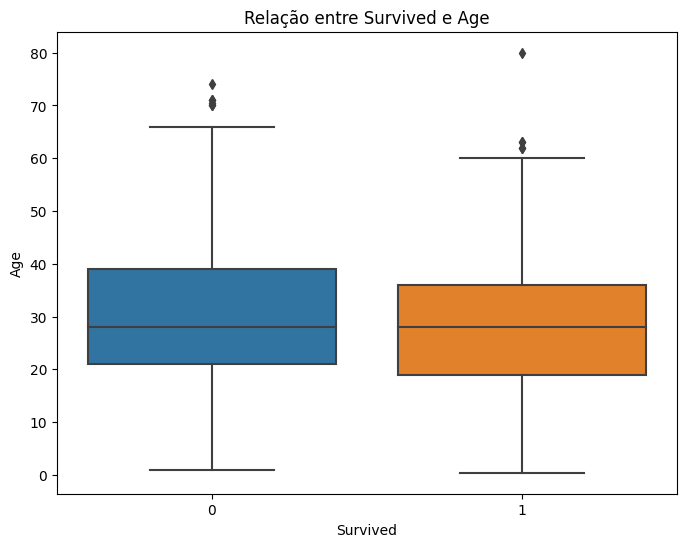

In [12]:
# Relação entre variáveis
quantitative_var = 'Age'
qualitative_var = 'Survived'

plt.figure(figsize=(8, 6))
sns.boxplot(x=qualitative_var, y=quantitative_var, data=dataset)
plt.xlabel(qualitative_var)
plt.ylabel(quantitative_var)
plt.title('Relação entre {} e {}'.format(qualitative_var, quantitative_var))


Text(0.5, 1.0, 'Pairplot para variáveis quantitativas')

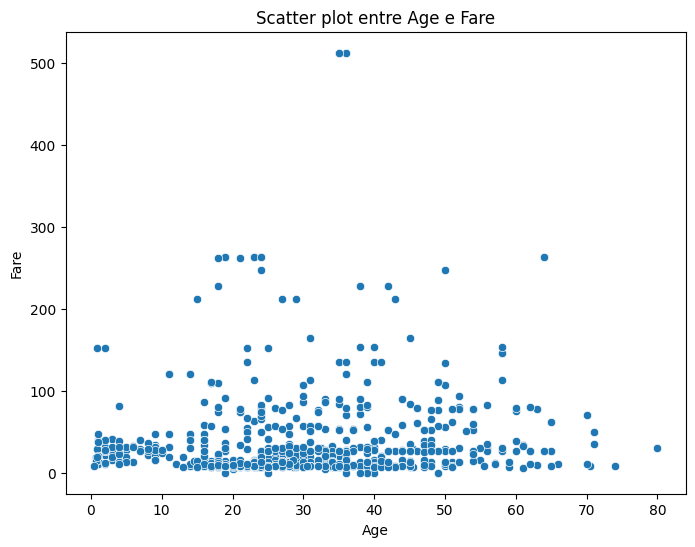

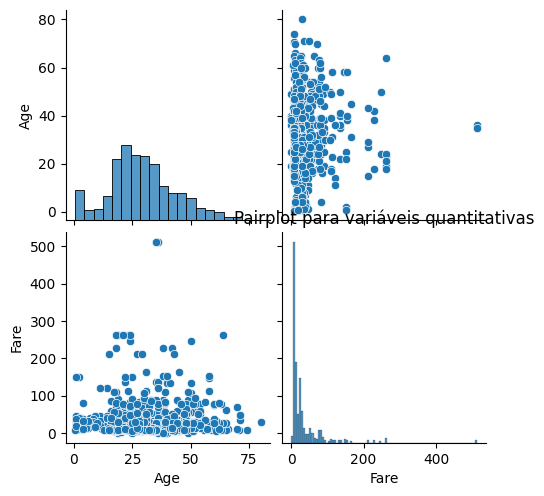

In [13]:
# Variáveis quantitativas
quantitative_vars = ['Age', 'Fare']

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=dataset)
plt.title('Scatter plot entre Age e Fare')

# Pairplot
sns.pairplot(dataset[quantitative_vars].dropna())
plt.title('Pairplot para variáveis quantitativas')


<ipython-input-13-c9388b28487b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


Text(0.5, 1.0, 'Mapa de calor da matriz de correlação')

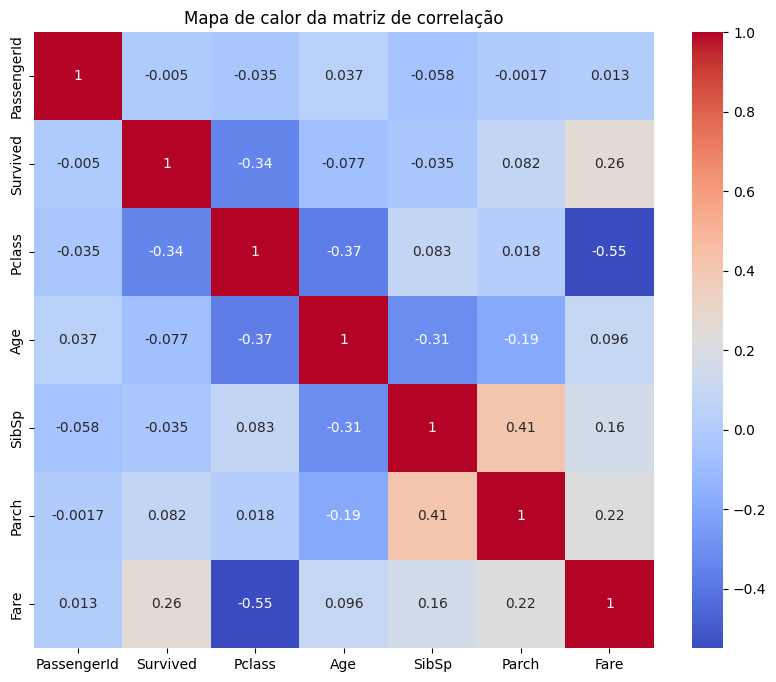

In [13]:
# Matriz de correlação
correlation_matrix = dataset.corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor da matriz de correlação')


In [14]:
# Análise automática
report = sv.analyze(dataset)
report.show_html()


/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packa

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
from scipy.stats import shapiro, ttest_1samp
import pandas as pd

# Variáveis quantitativas para os testes
quantitative_vars = ['Age', 'Fare', 'Pclass']

# Criação da tabela de resultados
results_table = pd.DataFrame(columns=['Variável', 'Teste de Normalidade (Shapiro-Wilk)', 'Teste de Média'])

for var in quantitative_vars:
    # Teste de normalidade (Shapiro-Wilk)
    stat, p_value = shapiro(dataset[var].dropna())
    normality_result = "Normal" if p_value > 0.05 else "Não normal"

    # Teste de média
    null_hypothesis_mean = dataset[var].mean()
    stat, p_value = ttest_1samp(dataset[var].dropna(), null_hypothesis_mean)
    mean_test_result = "Rejeita H0" if p_value < 0.05 else "Não rejeita H0"

    # Adiciona os resultados na tabela
    results_table = results_table.append({
        'Variável': var,
        'Teste de Normalidade (Shapiro-Wilk)': normality_result,
        'Teste de Média': mean_test_result
    }, ignore_index=True)

# Imprime a tabela de resultados
print(results_table)


AttributeError: 'DataFrame' object has no attribute 'append'